In [5]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 16, 9

SELECT YEAR(o_date), MONTH(o_date), SUM(price)<br>
FROM orders<br>
GROUP BY YEAR(o_date), MONTH(o_date)

In [3]:
df = pd.read_csv('data.csv')
FACT = np.array([
256798898,
232640416,
267994924,
262849522,
276933049,
251486085,
250559778,
261724749,
276675505,
287647539,
363102609,
422386052])

In [4]:
lr = lm.LinearRegression()

In [5]:
x = np.array([i for i in range(1, len(df)+1)])
y = df['data'].values

In [6]:
lr.fit(x.reshape(-1,1), y)
a = lr.coef_[0]
b = lr.intercept_
print(a, b)

8430033.702438727 83903222.2237457


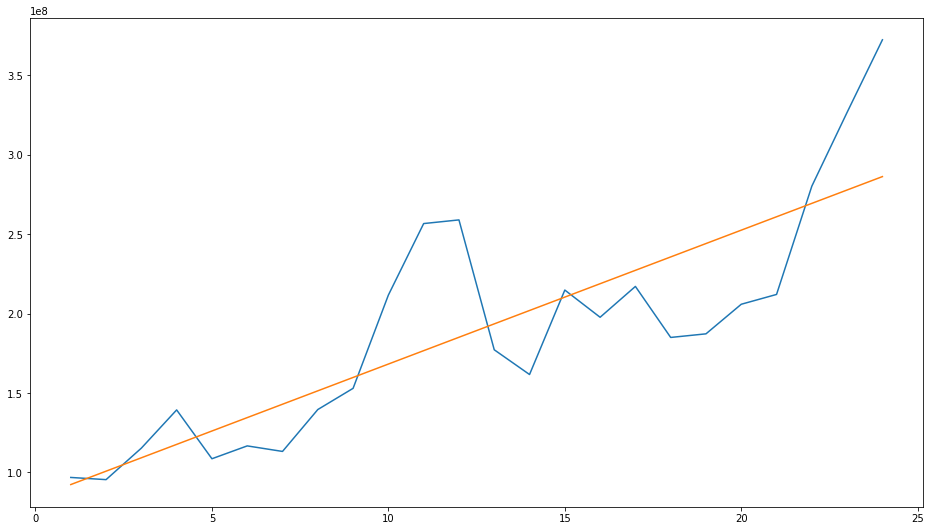

In [7]:
plt.plot(x, y)
plt.plot(x, a*x+b)


In [8]:
trend = a * x + b
df['trend'] = trend

In [9]:
df['seasson_coef'] = df['data'] / df['trend']

In [10]:
seasson_coefs_mean = np.array([np.mean(df.loc[df['month']==i]['seasson_coef']) for i in range(1, 13)])
seasson_coefs_mean

array([0.98212885, 0.87376284, 1.03837132, 1.0439737 , 0.90840973,
       0.82624298, 0.7795588 , 0.86870566, 0.88484205, 1.1492385 ,
       1.31453156, 1.35009433])

In [11]:
season_mean_coef = np.mean(seasson_coefs_mean)
season_mean_coef

1.001655027154983

In [12]:
seasson_coefs_clean = seasson_coefs_mean / season_mean_coef
seasson_coefs_clean

array([0.98050609, 0.87231913, 1.03665563, 1.04224875, 0.90690877,
       0.82487778, 0.77827074, 0.8672703 , 0.88338003, 1.14733963,
       1.31235957, 1.34786358])

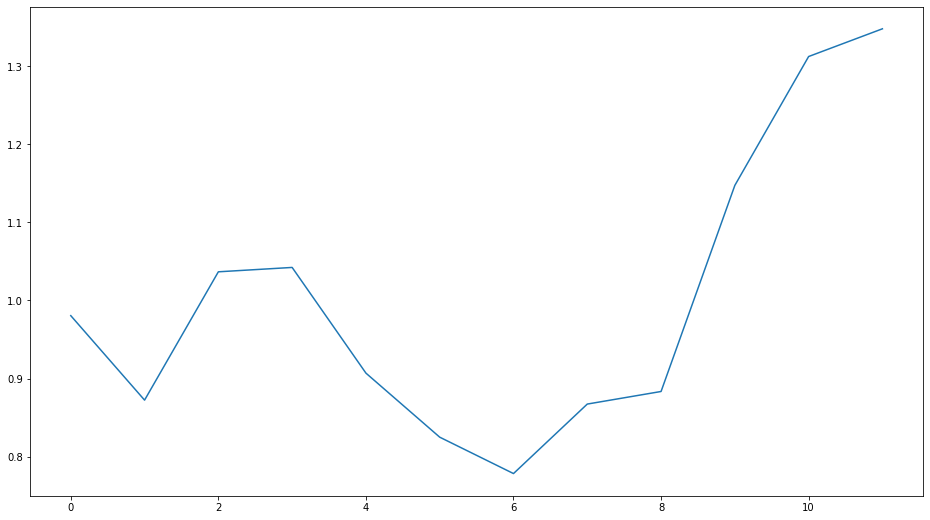

In [13]:
plt.plot(seasson_coefs_clean)

In [14]:
predict_range = np.linspace(25, 36, 12, dtype='int')
predict_range

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [15]:
predict_value = a * predict_range + b
predict_value

array([2.94654065e+08, 3.03084098e+08, 3.11514132e+08, 3.19944166e+08,
       3.28374200e+08, 3.36804233e+08, 3.45234267e+08, 3.53664301e+08,
       3.62094334e+08, 3.70524368e+08, 3.78954402e+08, 3.87384436e+08])

In [16]:
predict_value_seasson = predict_value * seasson_coefs_clean
predict_value_seasson

array([2.88910105e+08, 2.64386057e+08, 3.22932879e+08, 3.33461405e+08,
       2.97805440e+08, 2.77822329e+08, 2.68685728e+08, 3.06722546e+08,
       3.19866906e+08, 4.25117290e+08, 4.97324437e+08, 5.22141373e+08])

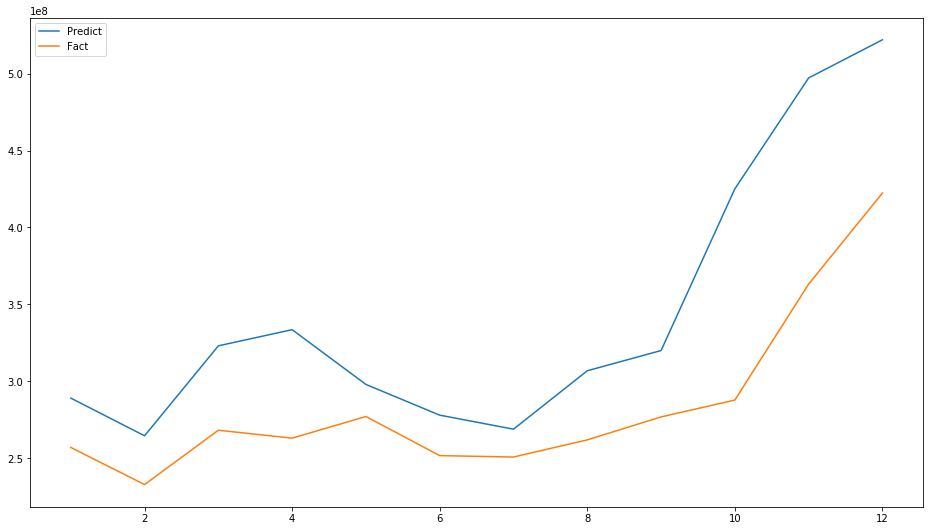

In [17]:
x = np.linspace(1, 12, 12, dtype='int')
plt.plot(x, predict_value_seasson, label='Predict')
plt.plot(x, FACT, label='Fact')
plt.legend()

In [18]:
predict_model = lr.predict(np.linspace(1, 36, 36).reshape(-1,1))

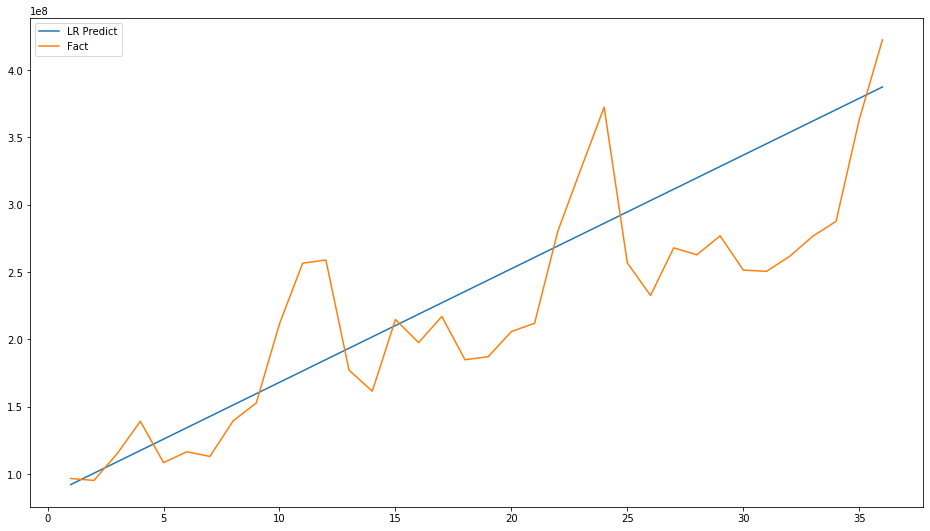

In [19]:
x = np.linspace(1, 36, 36)
plt.plot(x, predict_model, label='LR Predict')
plt.plot(x, np.append(df['data'].values, FACT), label='Fact')
plt.legend()

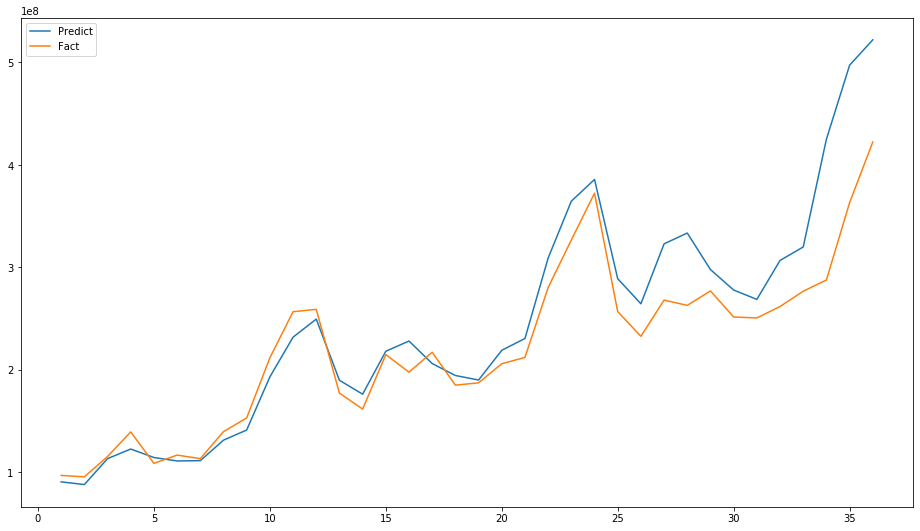

In [22]:
x = np.linspace(1, 36, 36)
y = (a * x + b) * np.array(list(seasson_coefs_clean)*3)
plt.plot(x, y, label='Predict')
plt.plot(x, np.append(df['data'].values, FACT), label='Fact')
plt.legend()

In [21]:
sqrt_error = (sum((FACT - predict_value_seasson)**2)/len(FACT))**0.5
sqrt_error

72027651.63933258